# QPQ Spec -- Tinkering with spectra in the database
### See qpq_spec.py module for more

In [2]:
%matplotlib inline

In [3]:
# imports
import glob 

from astropy.coordinates import SkyCoord
from astropy.units import Unit

from xastropy.obs import radec as xrad
from xastropy.xutils import fits as xxf
from xastropy.xutils import xdebug as xdb
from xastropy.spec import readwrite as xsr

import qpq_spec as qpqs

## Search QPQ database for spectral files

In [26]:
# Source
bg_qso = 'J005718.90-000134.7'
bg_ra = 14.328763368360512*u.degree
bg_dec = -0.02631087023488874*u.degree
#bg_qso = 'J080048.74+354231.3'
bg_qso2 = 'J124948.13+060709.0'
bg_qso

'J005718.90-000134.7'

In [27]:
reload(qpqs)
spec_files = qpqs.get_spec_files([bg_qso,bg_qso2])#, verbose=True)
#spec_files = qpqs.get_spec_files((bg_ra,bg_dec))
spec_files

[[u'/u/xavier/Dropbox//QSOPairs/data/BOSS/v5_7_0/SDSSJ005718.90-000134.7.fits.gz'],
 [u'/u/xavier/Dropbox//QSOPairs/data/LRIS_redux/SDSSJ124948.13+060709.0_b1200_F.fits.gz']]

In [6]:
reload(qpqs)
bg_ra = 192.450391578*u.degree
bg_dec = 6.11922910393*u.degree
spec_files = qpqs.get_spec_files((bg_ra,bg_dec),toler=1.*u.arcsec)
spec_files

[u'/u/xavier/Dropbox//QSOPairs/data/LRIS_redux/SDSSJ124948.13+060709.0_b1200_F.fits.gz']

In [103]:
cc = SkyCoord(ra=bg_ra, dec=bg_dec)

## Load up 

In [30]:
spec_files = spec_files[0] # May not be necessary

In [40]:
reload(qpqs)
aspec_dict = [qpqs.load_spec(spec_file) for spec_file in spec_files]
aspec_dict

[{u'conti': array([ 5.81565762,  5.7684288 ,  5.72098875, ..., -0.38245511,
         -0.37393203, -0.36503467], dtype=float32),
  u'file': u'/u/xavier/paper/QSOClustering//data/BOSS/v5_5_0/SDSSJ005718.90-000134.7.fits',
  u'instr': 'BOSS',
  u'spec': XSpectrum1D([ 0.59240758, -4.74473286,  7.49330425, ..., -3.06645155,
               -3.06654739, -3.06664324]),
  u'wvmnx': (<Quantity 3566.1532304264047 Angstrom>,
   <Quantity 10384.844550082738 Angstrom>)}]

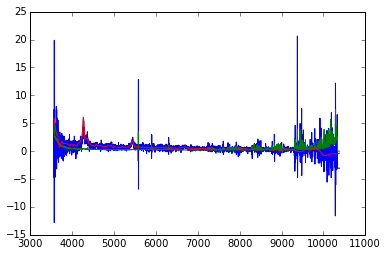

In [41]:
spec_dict = aspec_dict[0]
xdb.xplot(spec_dict['spec'].dispersion, spec_dict['spec'].flux, 
          spec_dict['spec'].sig, spec_dict['conti'])

## Continuum

In [19]:
reload(qpqs)
cfil = qpqs.find_conti_fil(spec_files[0])
glob.glob(cfil+'*')

[u'/u/xavier/Dropbox//QSOPairs/data/LRIS_redux/SDSSJ124948.13+060709.0_b1200_F_c.fits.gz']